In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm

Download data:

In [ ]:
!wget https://zenodo.org/record/4759091/files/GF_FESOM2_testdata.tar.gz

Unpack data

In [ ]:
!gunzip GF_FESOM2_testdata.tar.gz

In [ ]:
!tar -xvf GF_FESOM2_testdata.tar

Open netCDF files

In [4]:
sst = xr.open_dataset('./GF_FESOM2_testdata/sst.nc')
u = xr.open_dataset('./GF_FESOM2_testdata/u_surf.nc')
v = xr.open_dataset('./GF_FESOM2_testdata/v_surf.nc')

Plot the figure with U shading

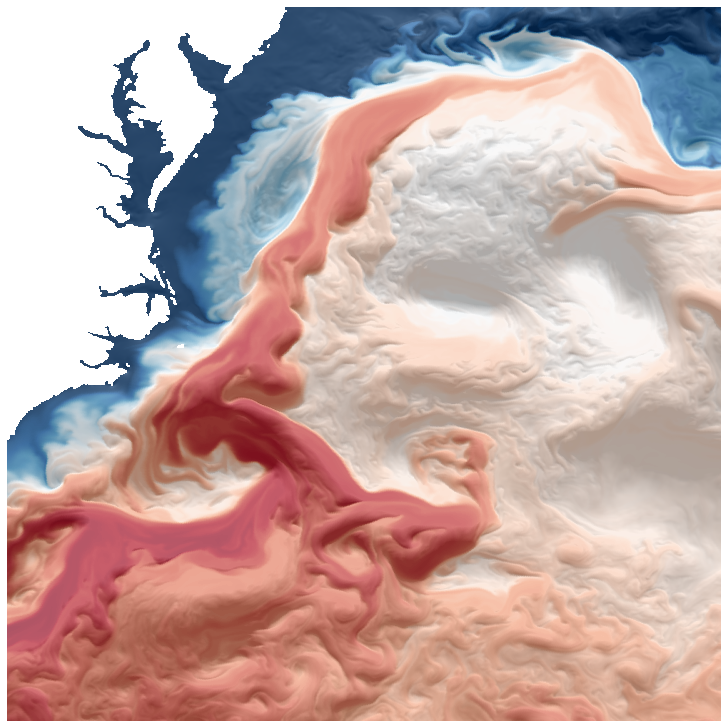

In [28]:
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(u.u_surf.values), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');
# plt.savefig('./out_figure.png', dpi=300)

Plot the figure with V shading

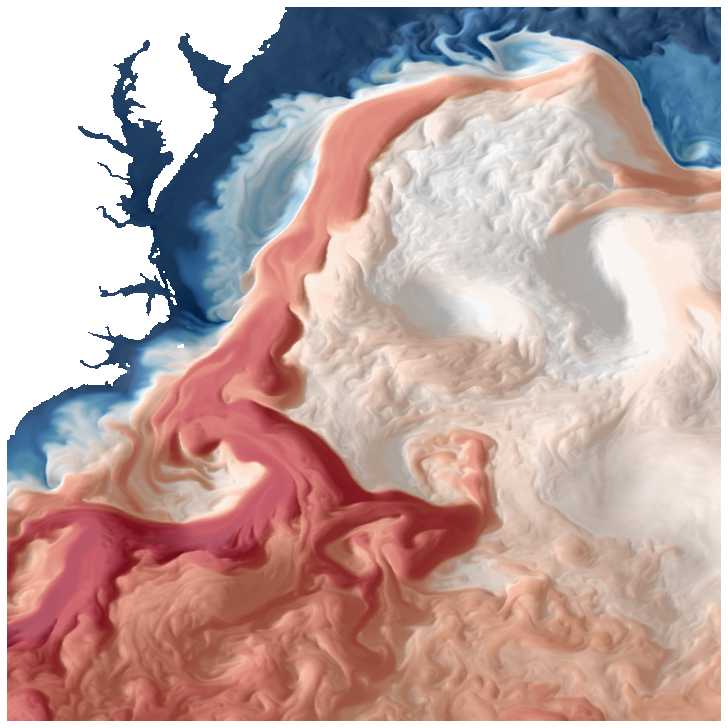

In [27]:
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(v.v_surf.values), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');


Rotate "light source" for U by 45 degrees

In [18]:
direct = np.rad2deg(np.arctan2(v.v_surf.values, u.u_surf.values))
speed_rot = np.hypot(u.u_surf.values, v.v_surf.values)

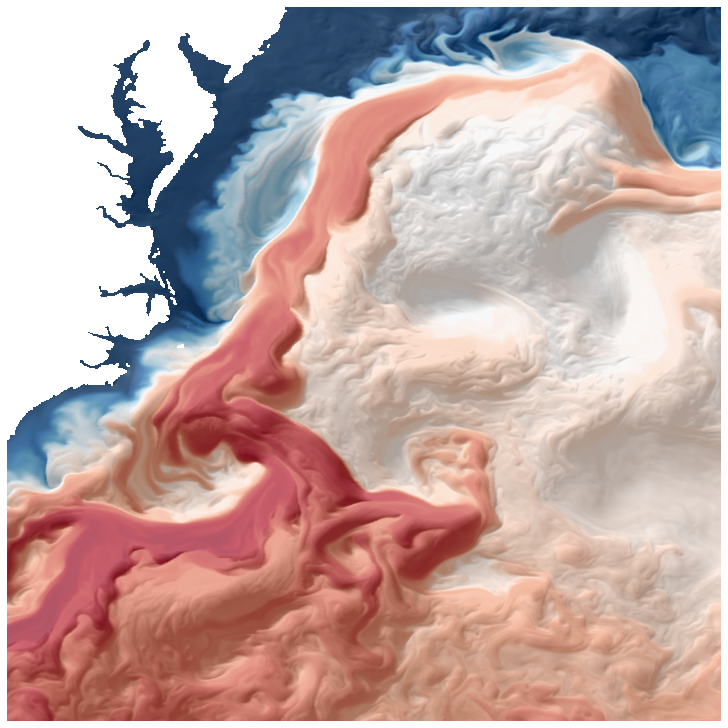

In [29]:
myangle = 45
U = speed_rot * np.cos(np.deg2rad(myangle - direct))
# V = speed_rot * np.sin(np.deg2rad(myangle - direct))
fig, ax = plt.subplots(
            1,
            1,
            constrained_layout=True,
            figsize=(10,10),
        )
ax.imshow(np.flipud(sst.sst.values), cmap=cm.RdBu_r,  vmin=12, vmax=24)
ax.imshow(np.flipud(U), alpha=0.3, cmap=cm.gray, vmin=-.3, vmax=0.3)
ax.axis('off');
    